In [1]:
import tensorflow

In [2]:
import pandas_datareader.data as pdr

In [3]:
import pandas as pd

In [4]:
import datetime as dt

In [5]:
df = pdr.DataReader('RELIANCE.NS','yahoo', start='2015-01-01', end='2020-12-31')

In [6]:
df.head

<bound method NDFrame.head of                    High          Low         Open        Close      Volume  \
Date                                                                         
2015-01-01   441.812073   437.676270   438.988831   439.781311   1367720.0   
2015-01-02   443.818054   437.998199   439.880371   438.617340   3383424.0   
2015-01-05   441.267212   432.946106   438.344940   433.812897   4662967.0   
2015-01-06   432.401276   412.093750   430.915344   414.124512   8596809.0   
2015-01-07   425.367950   414.570282   414.619812   423.139069   9562421.0   
...                 ...          ...          ...          ...         ...   
2020-12-24  1998.800049  1945.900024  1947.000000  1994.150024   9588577.0   
2020-12-28  2018.000000  1995.300049  2006.699951  2003.300049   7947719.0   
2020-12-29  2012.300049  1982.550049  2009.000000  1990.050049   8589407.0   
2020-12-30  2007.199951  1975.550049  1995.250000  1995.500000  10173132.0   
2020-12-31  2011.900024  1978.5999

In [7]:
df.to_csv('RELIANCE.NS.csv')

In [8]:
df = pd.read_csv('RELIANCE.NS.csv')

In [9]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-01-01,441.812073,437.676270,438.988831,439.781311,1367720.0,419.247375
1,2015-01-02,443.818054,437.998199,439.880371,438.617340,3383424.0,418.137695
2,2015-01-05,441.267212,432.946106,438.344940,433.812897,4662967.0,413.557648
3,2015-01-06,432.401276,412.093750,430.915344,414.124512,8596809.0,394.788483
4,2015-01-07,425.367950,414.570282,414.619812,423.139069,9562421.0,403.382172


In [13]:
df1 = df.reset_index()['Close']

In [14]:
df1.shape

(1478,)

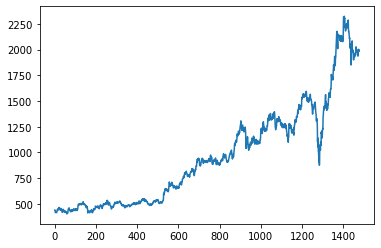

In [15]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [16]:
import numpy as np

In [17]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [18]:
df1.shape

(1478, 1)

In [19]:
print(df1)

[[0.01987163]
 [0.01926633]
 [0.0167679 ]
 ...
 [0.82605137]
 [0.82888548]
 [0.82358125]]


In [20]:
###splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]


In [21]:
training_size,test_size

(960, 518)

In [22]:
import numpy
def create_dataset(dataset,time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return numpy.array(dataX), numpy.array(dataY)

In [23]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [24]:
print(X_train.shape), print(y_train.shape)

(859, 100)
(859,)


(None, None)

In [25]:
print(X_test.shape), print(ytest.shape)

(417, 100)
(417,)


(None, None)

In [26]:
#reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [28]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
14/14 [==============================] - 10s 372ms/step - loss: 0.0075 - val_loss: 0.0349
Epoch 2/100
14/14 [==============================] - 3s 194ms/step - loss: 0.0010 - val_loss: 0.0081
Epoch 3/100
14/14 [==============================] - 3s 249ms/step - loss: 5.0167e-04 - val_loss: 0.0103
Epoch 4/100
14/14 [==============================] - 4s 259ms/step - loss: 3.9655e-04 - val_loss: 0.0073
Epoch 5/100
14/14 [==============================] - 4s 262ms/step - loss: 3.5746e-04 - val_loss: 0.0062
Epoch 6/100
14/14 [==============================] - 3s 246ms/step - loss: 3.4442e-04 - val_loss: 0.0066
Epoch 7/100
14/14 [==============================] - 4s 258ms/step - loss: 3.2596e-04 - val_loss: 0.0083
Epoch 8/100
14/14 [==============================] - 3s 229ms/step - loss: 3.2140e-04 - val_loss: 0.0065
Epoch 9/100
14/14 [==============================] - 4s 259ms/step - loss: 3.1031e-04 - val_loss: 0.0074
Epoch 10/100
14/14 [==============================] - 2s 166ms

In [31]:
import tensorflow as tf

In [32]:
tf.__version__

'2.5.0'

In [45]:
###Lets do the predicition and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [46]:
###Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [35]:
pip install -U scikit-learn --user

Note: you may need to restart the kernel to use updated packages.


In [47]:
import sklearn

In [37]:
 sklearn.show_versions()


System:
    python: 3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]
executable: C:\Users\LNOVO\anaconda3\python.exe
   machine: Windows-10-10.0.19041-SP0

Python dependencies:
          pip: 21.0.1
   setuptools: 52.0.0.post20210125
      sklearn: 0.24.2
        numpy: 1.19.5
        scipy: 1.7.1
       Cython: 0.29.23
       pandas: 1.2.4
   matplotlib: 3.4.2
       joblib: 1.0.1
threadpoolctl: 2.1.0

Built with OpenMP: True


In [38]:
pip install -U scikit-learn scipy matplotlib --user

Note: you may need to restart the kernel to use updated packages.


In [39]:
import sys

In [40]:
print(sys.path)

['C:\\Users\\LNOVO', 'C:\\Users\\LNOVO\\anaconda3\\python38.zip', 'C:\\Users\\LNOVO\\anaconda3\\DLLs', 'C:\\Users\\LNOVO\\anaconda3\\lib', 'C:\\Users\\LNOVO\\anaconda3', '', 'C:\\Users\\LNOVO\\AppData\\Roaming\\Python\\Python38\\site-packages', 'C:\\Users\\LNOVO\\anaconda3\\lib\\site-packages', 'C:\\Users\\LNOVO\\anaconda3\\lib\\site-packages\\locket-0.2.1-py3.8.egg', 'C:\\Users\\LNOVO\\anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\LNOVO\\anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\LNOVO\\anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\LNOVO\\anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\LNOVO\\.ipython']


In [41]:
sklearn.__version__

'0.24.2'

In [48]:
###Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

735.278834187403

In [49]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

1547.7912681417406

<function matplotlib.pyplot.show(close=None, block=None)>

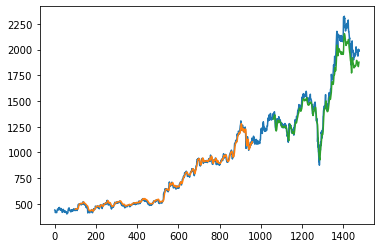

In [51]:
##Plotting
#shift train prediction for plotting
look_back =100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot [:, :] =np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
#shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :]=numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
#plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show

In [52]:
len(test_data)

518

In [54]:
x_input=test_data[418:].reshape(1,-1)
x_input.shape

(1, 100)

In [55]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [59]:
#logic to find next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input{}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input= x_input.reshape((1,n_steps,1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day out {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
        
print(lst_output)

0 day input[0.89758094 0.89469478 0.89040456 0.87873001 0.89287468 0.89963502
 0.88169413 0.87378976 0.88101807 0.87391977 0.90262517 0.88874051
 0.89162655 0.87319166 0.87659785 0.89789288 0.88952054 0.87139759
 0.87420568 0.88692041 0.91513181 0.9945137  0.99750385 0.98855943
 0.99703588 1.         0.98658331 0.99019746 0.96427425 0.941029
 0.95124758 0.92545425 0.93611478 0.94368118 0.95865795 0.9530937
 0.94836141 0.94157505 0.94061308 0.96513224 0.95564177 0.9526256
 0.95449774 0.97719682 0.98073302 0.93861093 0.92264616 0.92285412
 0.91229757 0.89602087 0.88684233 0.89001454 0.84635834 0.84916649
 0.83717987 0.84521431 0.85956701 0.76749641 0.75342975 0.78608734
 0.80782444 0.84638437 0.85759088 0.87519381 0.8297695  0.82082508
 0.82935352 0.82771543 0.82456924 0.81726292 0.77896301 0.8055883
 0.8125307  0.80408028 0.80657636 0.79471981 0.80777245 0.80946253
 0.8125307  0.80353423 0.8094885  0.82797544 0.84524027 0.83486578
 0.83424178 0.8267014  0.81788693 0.81903102 0.82373722 

10 day out [[0.5154338]]
11 day input[0.88874051 0.89162655 0.87319166 0.87659785 0.89789288 0.88952054
 0.87139759 0.87420568 0.88692041 0.91513181 0.9945137  0.99750385
 0.98855943 0.99703588 1.         0.98658331 0.99019746 0.96427425
 0.941029   0.95124758 0.92545425 0.93611478 0.94368118 0.95865795
 0.9530937  0.94836141 0.94157505 0.94061308 0.96513224 0.95564177
 0.9526256  0.95449774 0.97719682 0.98073302 0.93861093 0.92264616
 0.92285412 0.91229757 0.89602087 0.88684233 0.89001454 0.84635834
 0.84916649 0.83717987 0.84521431 0.85956701 0.76749641 0.75342975
 0.78608734 0.80782444 0.84638437 0.85759088 0.87519381 0.8297695
 0.82082508 0.82935352 0.82771543 0.82456924 0.81726292 0.77896301
 0.8055883  0.8125307  0.80408028 0.80657636 0.79471981 0.80777245
 0.80946253 0.8125307  0.80353423 0.8094885  0.82797544 0.84524027
 0.83486578 0.83424178 0.8267014  0.81788693 0.81903102 0.82373722
 0.82683141 0.79986802 0.79830794 0.80202614 0.82818346 0.83294171
 0.82605137 0.82888548 0.8

21 day out [[0.38416973]]
22 day input[0.99750385 0.98855943 0.99703588 1.         0.98658331 0.99019746
 0.96427425 0.941029   0.95124758 0.92545425 0.93611478 0.94368118
 0.95865795 0.9530937  0.94836141 0.94157505 0.94061308 0.96513224
 0.95564177 0.9526256  0.95449774 0.97719682 0.98073302 0.93861093
 0.92264616 0.92285412 0.91229757 0.89602087 0.88684233 0.89001454
 0.84635834 0.84916649 0.83717987 0.84521431 0.85956701 0.76749641
 0.75342975 0.78608734 0.80782444 0.84638437 0.85759088 0.87519381
 0.8297695  0.82082508 0.82935352 0.82771543 0.82456924 0.81726292
 0.77896301 0.8055883  0.8125307  0.80408028 0.80657636 0.79471981
 0.80777245 0.80946253 0.8125307  0.80353423 0.8094885  0.82797544
 0.84524027 0.83486578 0.83424178 0.8267014  0.81788693 0.81903102
 0.82373722 0.82683141 0.79986802 0.79830794 0.80202614 0.82818346
 0.83294171 0.82605137 0.82888548 0.82358125 0.76958734 0.7514264
 0.72654963 0.70029122 0.67472219 0.6504848  0.62769043 0.60627091
 0.58610135 0.56704742 0.

In [60]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [61]:
import matplotlib.pyplot as plt

In [62]:
len(df1)

1478

In [63]:
df3=df1.tolist()
df3.extend(lst_output)

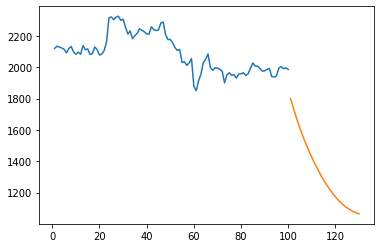

In [64]:
plt.plot(day_new, scaler.inverse_transform(df1[1378:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

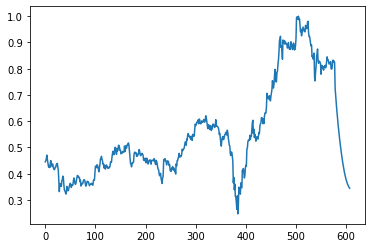

In [67]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[900:])